In [1]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### scipy_optimize

In [2]:
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.hstack((X, bias))

def compute_gradient(theta, X, y):
    theta = theta.reshape(-1, 1)
    predictions = np.dot(X, theta)
    gradient = np.dot(X.transpose(), (predictions - y)) / len(y)
    return gradient.flatten()

def linear_regression_cost_function(theta, X, y):
    theta = theta.reshape(-1, 1)
    predictions = np.dot(X, theta)
    errors = predictions - y
    return np.mean(errors ** 2) / 2

def fit(X, y):
    initial_theta = np.zeros(X.shape[1])
    result = minimize(fun=linear_regression_cost_function,
                    x0=initial_theta,
                    args=(X, y),
                    jac=compute_gradient,
                    method='Newton-CG')
    return result.x

### homework_ex1_01

In [3]:
data1 = pd.read_csv("../data/ex1data1.txt", names=["population", "profit"])
X1 = np.array(data1['population']).reshape(97, 1)
y1 = np.array(data1['profit']).reshape(97, 1)

In [4]:
X1_with_bias = add_bias(X1)
initial_theta = np.zeros((2, 1))

In [5]:
init_mse_loss = linear_regression_cost_function(initial_theta, X1_with_bias, y1)
print(f"初始 MSE 损失: {init_mse_loss}")

optim_theta = fit(X1_with_bias, y1)
print(f"最终的 theta 值: {optim_theta}")

final_mse_loss = linear_regression_cost_function(optim_theta, X1_with_bias, y1)
print(f"最终 MSE 损失: {final_mse_loss}")

初始 MSE 损失: 32.072733877455676
最终的 theta 值: [ 1.19303365 -3.89578091]
最终 MSE 损失: 4.476971375975178


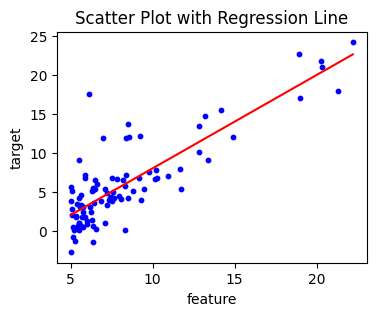

In [6]:
slope = optim_theta[0]
intercept = optim_theta[1]
line_x = np.linspace(X1.min(), X1.max(), 100)
line_y = slope * line_x + intercept

plt.figure(figsize=(4, 3))
plt.scatter(X1, y1, color='blue', s=10)
plt.plot(line_x, line_y, color='red')
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Scatter Plot with Regression Line')
plt.show()

### homework_ex1_02

In [7]:
data2 = pd.read_csv('../data/ex1data2.txt', names=['size', 'bedroom', 'price'])
data2 = (data2 - data2.mean()) / data2.std()

X2 = np.array(data2.iloc[:, 0:-1])
y2 = np.array(data2.iloc[:, -1]).reshape((-1, 1))

In [8]:
X2_with_bias = add_bias(X2)
initial_theta = np.zeros((3, 1))

In [9]:
init_mse_loss = linear_regression_cost_function(initial_theta, X2_with_bias, y2)
print(f"初始 MSE 损失: {init_mse_loss}")

optim_theta = fit(X2_with_bias, y2)
print(f"最终的 theta 值: {optim_theta}")

final_mse_loss = linear_regression_cost_function(optim_theta, X2_with_bias, y2)
print(f"最终 MSE 损失: {final_mse_loss}")

初始 MSE 损失: 0.4893617021276595
最终的 theta 值: [ 8.84765986e-01 -5.31788220e-02  9.64343188e-10]
最终 MSE 损失: 0.13068648053904197
